### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:

min_qubits=5
max_qubits=10
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these lines when running on hardware backend, to limit use of resources

# num_shots=100

HHL Benchmark Program - Qiskit
... execution starting at 2023-07-08 03:55:32
************
Executing 3 circuits with 1 input qubits and 2 clock qubits
... counts = {'0 1': 261, '1 1': 241, '0 0': 268, '1 0': 230}
... ratio of counts with ancilla measured |1> : 0.471
************
Executing 3 circuits with 1 input qubits and 3 clock qubits
... counts = {'1 0': 196, '1 1': 249, '0 0': 280, '0 1': 275}
... ratio of counts with ancilla measured |1> : 0.445
************
Average Depth, ξ (xi) for the 5 qubit group = 14, 0
Average Transpiled Depth, ξ (xi) for the 5 qubit group = 228, 0.312
Average Creation Time for the 5 qubit group = 0.013 secs
Average Elapsed Time for the 5 qubit group = 3.837 secs
Average Execution Time for the 5 qubit group = 0.47 secs
Average Fidelity for the 5 qubit group = 0.165

************
Executing 3 circuits with 2 input qubits and 2 clock qubits
... counts = {'0 0': 275, '1 1': 223, '0 1': 298, '1 0': 204}
... ratio of counts with ancilla measured |1> : 0.427
*****

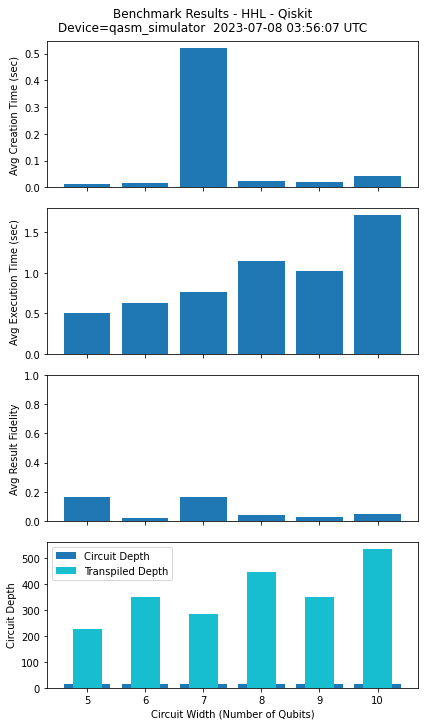

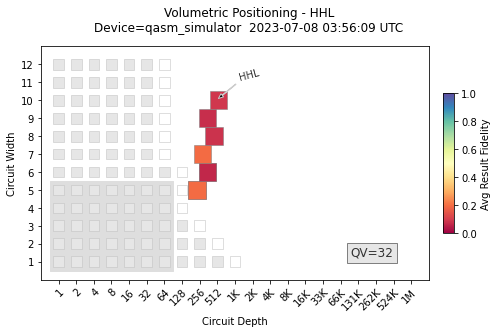

In [2]:
#%run bernstein-vazirani/qiskit/hhl_benchmark.py
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

# set noise to None for testing
import execute
#execute.set_noise_model(None)

hhl_benchmark.verbose=True

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

HHL Benchmark Program - Qiskit
... execution starting at 2023-07-08 03:56:11
************
Executing 3 circuits with 1 input qubits and 2 clock qubits
... counts = {'0 1': 289, '0 0': 283, '1 1': 216, '1 0': 212}
... ratio of counts with ancilla measured |1> : 0.428
************
Executing 3 circuits with 1 input qubits and 3 clock qubits
... counts = {'0 1': 278, '1 0': 256, '1 1': 209, '0 0': 257}
... ratio of counts with ancilla measured |1> : 0.465
************
Average Depth, ξ (xi) for the 5 qubit group = 14, 0
Average Transpiled Depth, ξ (xi) for the 5 qubit group = 228, 0.312
Average Creation Time for the 5 qubit group = 0.01 secs
Average Elapsed Time for the 5 qubit group = 4.341 secs
Average Execution Time for the 5 qubit group = 0.506 secs
Average Fidelity for the 5 qubit group = 0.155

************
Executing 3 circuits with 2 input qubits and 2 clock qubits
... counts = {'0 0': 266, '0 1': 271, '1 0': 211, '1 1': 252}
... ratio of counts with ancilla measured |1> : 0.463
*****

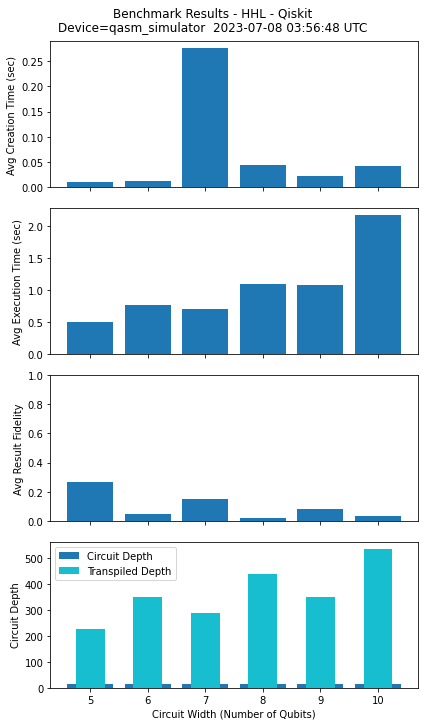

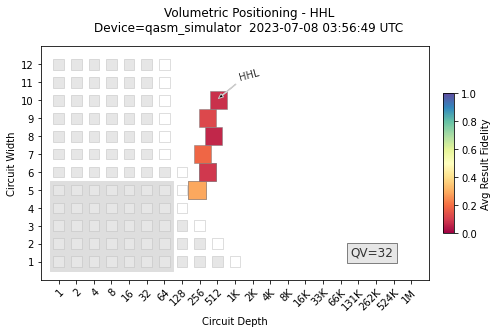

In [3]:
#%run bernstein-vazirani/qiskit/hhl_benchmark.py
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

# set noise to None for testing
import execute
#execute.set_noise_model(None)

hhl_benchmark.verbose=True

# This run2 method allows you to specify an arbitrary range of input and clock qubit sizes

min_input_qubits=1
max_input_qubits=3
min_clock_qubits=2
max_clock_qubits=3

hhl_benchmark.run2(min_input_qubits=min_input_qubits, max_input_qubits=max_input_qubits,
                 min_clock_qubits=min_clock_qubits, max_clock_qubits=max_clock_qubits,
                 max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

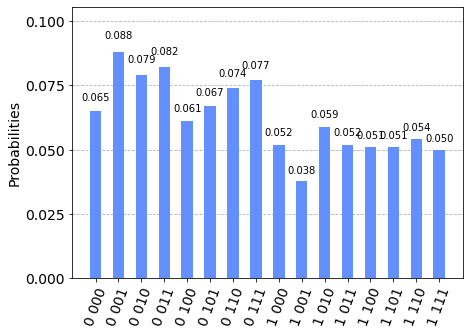

In [4]:
from qiskit.visualization import plot_histogram

# Get the counts, the frequency of each answer
counts = hhl_benchmark.saved_result.get_counts()

# Display the results
plot_histogram(counts)

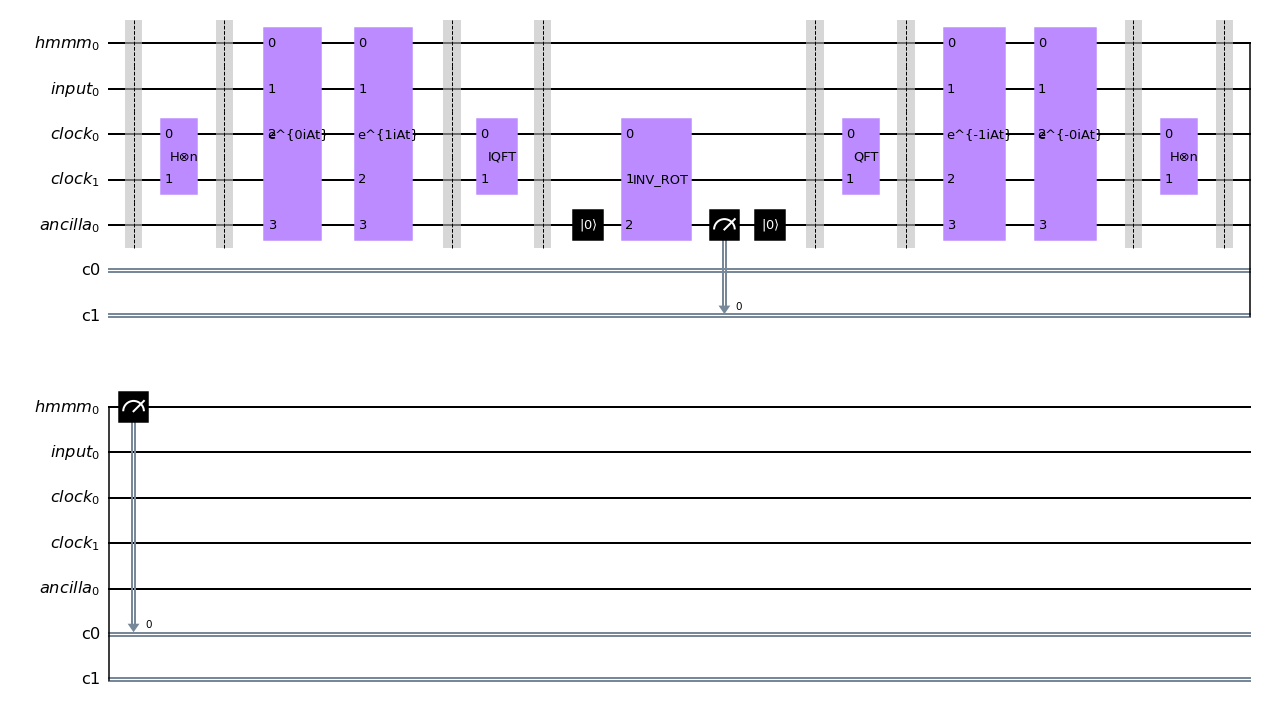

In [5]:
hhl_benchmark.QC_.draw('mpl',scale=1)
#print(circuit)